# Proyecto Final

#### Información sobre: Las importaciones de Plaguicidas, en el país de Guatemala

###### Importacion de Librerias 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
datas= pd.ExcelFile('BD_Importaciones.xlsx')
print(datas.sheet_names)

['hoja1']


In [4]:
dataset = datas.parse('hoja1')


In [5]:
dataset.head()

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,CIF_US$,CIF_Q,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.
0,Guatemala,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,6659.6,51611.90,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18
1,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,48000.0,355968.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18
2,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,30000.0,222480.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18
3,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,706.0,5299.17,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18
4,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,6561.0,49246.28,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18


#### Transformaciones del pipeline de ingenieria de Caracteristicas

###### Indentificar el total de columnas y filas   tiene la data.

In [6]:
dataset.shape

(6425, 28)

######  el dataset  sufrio una modificación y estamos trbajando con 6425 observaciones y 28 Variables. 

In [7]:
# verificamos si las variables a visualizar tienen NA's 


###### Las variables a visualizar son:  1) Cantidad ; 2) Clase; 3) I.A.; 4) CIF US$; 5 ) Precio ; 6) Clasificación

In [8]:
dataset ['I.A.']. isnull().sum()

0

In [9]:
dataset ['Cantidad']. isnull().sum()

0

In [10]:
dataset ['CIF_US$']. isnull().sum()

0

In [11]:
dataset ['Precio']. isnull().sum()

0

In [12]:
dataset ['Año']. isnull().sum()

0

In [13]:
dataset ['Clase']. isnull().sum()

0

In [14]:
# Conocer los nombres de las variables
dataset.columns

Index(['País', 'Año', 'Registro', 'Clasificacion', 'Clase', 'Modo_de_acción',
       'Grupo_Químico', 'I.A.', 'Marca', 'Concentración', 'Grupo_importador',
       'Importador', 'Aduana', 'Transporte', 'País_Origen', 'País_procedencia',
       'Cantidad', 'Unidad', 'CIF_US$', 'CIF_Q', 'Precio', 'Fecha', 'Mes',
       'Grupo_fabricante/Offshore', 'Fabricante/Offshore', 'Timbres', 'Estado',
       'Documento_Imp.'],
      dtype='object')

In [16]:
# Identificando el tipo de varible
colnames = dataset.columns
for col in colnames:
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [17]:
# Verificamos que otras variables nos pueden deovlver NA's
colnames = dataset.columns
for col in colnames:
    if(dataset[col].isnull().sum () > 0):
     print(col)

In [18]:
# Meter las columnas que tienen N'as  en una lista
colnames = dataset.columns
cols_con_na = []
for col in colnames:
    if(dataset[col].isnull().sum () > 0):
     cols_con_na.append(col)
cols_con_na

[]

In [19]:
# Definir una función , para pasar el dataframe#  
# Sirve para cualquier dataframe que deseamos analizar, asignamos una función 

def getNanColNames (df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum () > 0):
            cols_con_na.append(col)
    return cols_con_na

In [20]:
# Declarar una varibale, 
Cols_Con_nan = getNanColNames(dataset)
Cols_Con_nan

[]

In [21]:
# Verificamos el tipo de devariable 
dataset[Cols_Con_nan].dtypes

Series([], dtype: object)

In [22]:
# Verificamos la proporción de Na´s
# Genera la cantidad de faltantes que tiene la columna
dataset[Cols_Con_nan].isnull().mean()

Series([], dtype: float64)

In [23]:
# Son variables procesables faciles, y generamos una lista vacía.
def getNangoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if ((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables

In [24]:
Cols_procesables = getNangoodColsNames(dataset)
Cols_procesables

['País',
 'Año',
 'Registro',
 'Clasificacion',
 'Clase',
 'Modo_de_acción',
 'Grupo_Químico',
 'I.A.',
 'Marca',
 'Concentración',
 'Grupo_importador',
 'Importador',
 'Aduana',
 'Transporte',
 'País_Origen',
 'País_procedencia',
 'Cantidad',
 'Unidad',
 'CIF_US$',
 'CIF_Q',
 'Precio',
 'Fecha',
 'Mes',
 'Grupo_fabricante/Offshore',
 'Fabricante/Offshore',
 'Timbres',
 'Estado',
 'Documento_Imp.']

In [25]:
Cols_procesables = getNangoodColsNames(dataset, 0.05)
Cols_procesables

['País',
 'Año',
 'Registro',
 'Clasificacion',
 'Clase',
 'Modo_de_acción',
 'Grupo_Químico',
 'I.A.',
 'Marca',
 'Concentración',
 'Grupo_importador',
 'Importador',
 'Aduana',
 'Transporte',
 'País_Origen',
 'País_procedencia',
 'Cantidad',
 'Unidad',
 'CIF_US$',
 'CIF_Q',
 'Precio',
 'Fecha',
 'Mes',
 'Grupo_fabricante/Offshore',
 'Fabricante/Offshore',
 'Timbres',
 'Estado',
 'Documento_Imp.']

In [32]:
# ser mas restrictivo con el Rate: , para omitir  una variable para tratarla, las que tienen menos
# del 5%

Cols_cca = getNangoodColsNames(dataset, 0.05)
Cols_cca

['País',
 'Año',
 'Registro',
 'Clasificacion',
 'Clase',
 'Modo_de_acción',
 'Grupo_Químico',
 'I.A.',
 'Marca',
 'Concentración',
 'Grupo_importador',
 'Importador',
 'Aduana',
 'Transporte',
 'País_Origen',
 'País_procedencia',
 'Cantidad',
 'Unidad',
 'CIF_US$',
 'CIF_Q',
 'Precio',
 'Fecha',
 'Mes',
 'Grupo_fabricante/Offshore',
 'Fabricante/Offshore',
 'Timbres',
 'Estado',
 'Documento_Imp.']

In [33]:
# aplicamos el Criterio de CCA
# Aplicamos criterios de CCA ( para casos de analísis completos )
dataset_temp = dataset[Cols_cca].dropna()

In [34]:
dataset_temp.shape, dataset.shape

((6425, 28), (6425, 28))

In [58]:
dataset_temp['Clase'].isnull().sum()

0

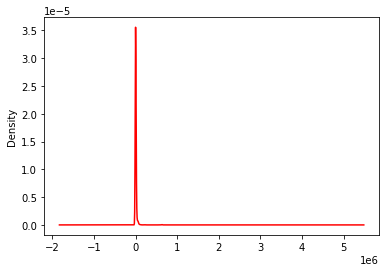

In [59]:
### Análisis  más profundo 
dataset['Cantidad'].plot.density(color = "red")
plt.show()

In [60]:
# sacar y conocer la media 
meanValue = dataset['Cantidad'].mean ()
meanValue

7958.204316472094

In [61]:
# sacamos la mediana 
medianValue = dataset['Cantidad'].median ()
medianValue

1200.0

In [62]:
# eliminar  los decimales, para imputar números enteros
#IMPUTACIÓN DE LA MEDIA Y LA MEDIANA
meanValue = np.round(dataset['Cantidad'].mean (), 0)
medianValue = np.round(dataset['Cantidad'].median (), 0)

In [63]:
meanValue

7958.0

In [64]:
medianValue

1200.0

In [65]:
# procedemos a imputar los datos con número enteros
dataset_FL_meanImp = dataset['Cantidad'].fillna(meanValue)
dataset_FL_medianImp = dataset['Cantidad'].fillna(medianValue)

In [66]:
dataset_FL_meanImp

0         240.0
1       16000.0
2       10000.0
3         200.0
4        2025.0
         ...   
6420     2304.0
6421     7920.0
6422     5280.0
6423     7260.0
6424     5280.0
Name: Cantidad, Length: 6425, dtype: float64

In [67]:
medianValue

1200.0

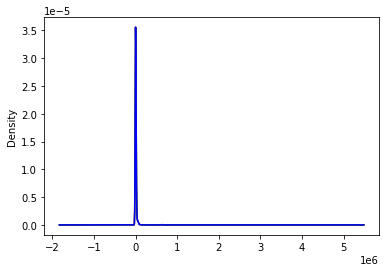

In [68]:
# vamos a crear una gráfica para ver la variación 
# (111, significado es que gráficamos una fila, una columna , una figura)
fig = plt.figure()
fig.add_subplot(111)
dataset['Cantidad'].plot.density(color = "red")
dataset_FL_meanImp.plot.density(color = "green")
dataset_FL_medianImp.plot.density(color = "blue")
plt.show()

###### Para definir un mejor criterio entre la media o mediana, para tratar los datros.  un criterio base/ considerado la capacidad predictiba en lugar de un criterio de distorsión. 

In [69]:
np.corrcoef(dataset_FL_meanImp, dataset['CIF_US$'])

array([[1.        , 0.19182253],
       [0.19182253, 1.        ]])

In [70]:
np.corrcoef(dataset_FL_medianImp, dataset['CIF_US$'])

array([[1.        , 0.19182253],
       [0.19182253, 1.        ]])

In [71]:
# comentario:  se deshabilito para no caerle encima porque se requiere imputación con los N'as
#dataset['Cantidad'] = dataset['Cantidad'].fillna(meanValue)

In [72]:
dataset

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,CIF_US$,CIF_Q,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.
0,Guatemala,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,6659.60,51611.90,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18
1,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,48000.00,355968.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18
2,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,30000.00,222480.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18
3,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,706.00,5299.17,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18
4,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,6561.00,49246.28,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Guatemala,2018,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,9208.86,70942.66,3.996901,2018-10-01,octubre,Syngenta,"Syngenta, S.A",172.0,Líquido,1856-18
6421,Guatemala,2019,-302-35A-5,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,49104.00,376966.50,6.200000,2019-04-01,abril,Syngenta,"Syngenta Crop Protection, S.A.",507.0,Líquido,847-19
6422,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,17390.40,133372.89,3.293636,2019-04-08,abril,Syngenta,"Syngenta, S.A.",264.0,Líquido,921-19
6423,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,23701.80,182510.73,3.264711,2019-06-20,junio,Syngenta,"Syngenta, S.A.",313.0,Líquido,1673-19


In [73]:
#Si en dado caso no se llegara ejecutar correctamente la varianza es necesario  llamar dataset, en está posición
# si la varianza genera el mismo dato.
 # dataset = pd.read_Excel ('BD_Importaciones.xlsx')

In [74]:
dataset['Cantidad'].isnull().sum()

0

In [75]:
# Proceder con la Imputación Arbritaria
dataset_IA = dataset

In [76]:
dataset_IA['Cantidad'].describe ()

count    6.425000e+03
mean     7.958204e+03
std      5.322214e+04
min      2.000000e-02
25%      3.000000e+02
50%      1.200000e+03
75%      7.846000e+03
max      3.657984e+06
Name: Cantidad, dtype: float64

In [77]:
# una imputación arbritaria atipica, es un numero sea un poco más grande y la tipica es -1
dataset_IA['Cantidad_320']= dataset_IA['Cantidad'].fillna(320)
dataset_IA['Cantidad_-1']= dataset_IA['Cantidad'].fillna(-1)

In [78]:
# proceder con el Análisis de la varianza
print("Varianza original:", dataset_IA['Cantidad'].var())
print("Varianza 320:", dataset_IA['Cantidad'].var())
print("Varianza -1:", dataset_IA['Cantidad_-1'].var())

Varianza original: 2832595957.3341985
Varianza 320: 2832595957.3341985
Varianza -1: 2832595957.3341985


In [79]:
dataset_IA

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.,Cantidad_320,Cantidad_-1
0,Guatemala,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18,240.0,240.0
1,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18,16000.0,16000.0
2,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18,10000.0,10000.0
3,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18,200.0,200.0
4,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18,2025.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Guatemala,2018,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,3.996901,2018-10-01,octubre,Syngenta,"Syngenta, S.A",172.0,Líquido,1856-18,2304.0,2304.0
6421,Guatemala,2019,-302-35A-5,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,6.200000,2019-04-01,abril,Syngenta,"Syngenta Crop Protection, S.A.",507.0,Líquido,847-19,7920.0,7920.0
6422,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,3.293636,2019-04-08,abril,Syngenta,"Syngenta, S.A.",264.0,Líquido,921-19,5280.0,5280.0
6423,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,3.264711,2019-06-20,junio,Syngenta,"Syngenta, S.A.",313.0,Líquido,1673-19,7260.0,7260.0


<AxesSubplot:ylabel='Density'>

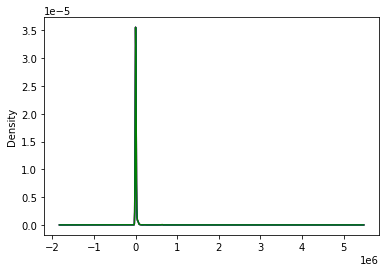

In [80]:
# gráficar para ver que tanto se deforma la distribución 
fig = plt.figure()
ax = fig.add_subplot(111)
dataset_IA['Cantidad'].plot.density(color = "red", label ="original")
dataset_IA['Cantidad_320'].plot.density(color = "blue", label ="320")
dataset_IA['Cantidad_-1'].plot.density(color = "green", label ="-1")

In [81]:
# cuando la variable no es un número ,  pero es una categoria. 
# Trabajamos la imputación de Categorías Faltantes
# verificamos , las  que son object, son categoricas, tipo string. 
dataset[Cols_Con_nan].dtypes

Series([], dtype: object)

In [82]:
dataset_cat_missing= dataset[['Clase', 'I.A.', 'CIF_US$']]

In [83]:
dataset_cat_missing.head()

,Clase,I.A.,CIF_US$
0,Herbicida,Dicamba,6659.6
1,Herbicida,"2,4-D",48000.0
2,Herbicida,"2,4-D",30000.0
3,Herbicida,"2,4-D",706.0
4,Herbicida,"2,4-D",6561.0


In [84]:
dataset_cat_missing.isnull().sum()

Clase      0
I.A.       0
CIF_US$    0
dtype: int64

In [85]:
dataset_cat_missing.isnull().mean()

Clase      0.0
I.A.       0.0
CIF_US$    0.0
dtype: float64

In [86]:
# los criterios que se debe de utilizar  para verificar que información nos provee la columan 
dataset_cat_missing['Clase'].value_counts ()

Fungicida                   2239
Insecticida                 1647
Herbicida                   1500
Coadyuvante                  240
Regulador de crecimiento     142
Fumigante                    123
Nematicida                   108
Tratador de semilla           91
Otro                          84
Regulador de Crecimiento      83
Acondicionador de pH          58
Bactericida                   40
Rodenticida                   18
ND                            15
Molusquicida                  12
Hormiguicida                  11
Feromona                       9
molusquicida                   3
fungicida                      2
Name: Clase, dtype: int64

In [87]:
# si se toma una casa aleatoria , para apelar una imputación. 
dataset_cat_missing['Clase'].value_counts () /len(dataset_cat_missing)

Fungicida                   0.348482
Insecticida                 0.256342
Herbicida                   0.233463
Coadyuvante                 0.037354
Regulador de crecimiento    0.022101
Fumigante                   0.019144
Nematicida                  0.016809
Tratador de semilla         0.014163
Otro                        0.013074
Regulador de Crecimiento    0.012918
Acondicionador de pH        0.009027
Bactericida                 0.006226
Rodenticida                 0.002802
ND                          0.002335
Molusquicida                0.001868
Hormiguicida                0.001712
Feromona                    0.001401
molusquicida                0.000467
fungicida                   0.000311
Name: Clase, dtype: float64

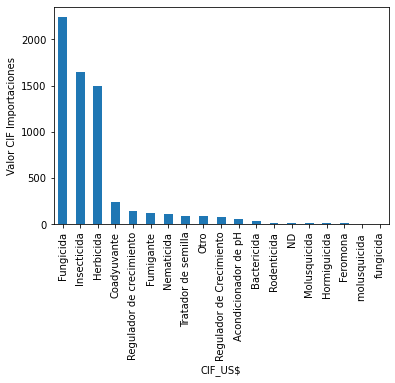

In [88]:
# Gráficar la columna
dataset_cat_missing['Clase'].value_counts ().sort_values (ascending= False).plot.bar()
plt.ylabel("Valor CIF Importaciones")
plt.xlabel("CIF_US$")
plt.show()

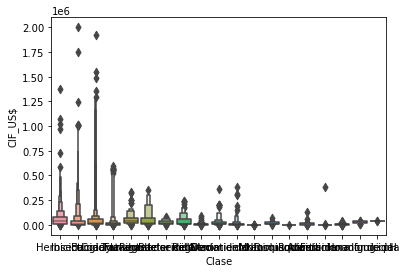

In [89]:
# Verificar cual de los elementos es má probable de faltantes
import seaborn as sns
fclase = dataset_cat_missing['Clase']
valor = dataset_cat_missing['CIF_US$']
sns.boxenplot(x= fclase, y=valor)
plt.show()

ValueError: zero-size array to reduction operation fmax which has no identity

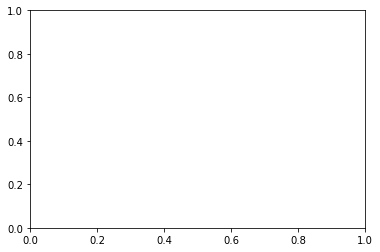

In [90]:
# Si se agarran los nulos  y seleccionamos exclusivamente los faltantes.
# gráficar para ver que tanto se deforma la distribución 
fig = plt.figure()
ax = fig.add_subplot(111)
dataset_cat_missing[dataset_cat_missing['Clase'].isnull()]['CIF_US$'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['Clase']== 'Herbicida']['CIF_US$'].plot(kind="kde", color="blue", label="Herbicida")
dataset_cat_missing[dataset_cat_missing['Clase']== 'Fungicida']['CIF_US$'].plot(kind="kde", color="green", label="Fungicida")
dataset_cat_missing[dataset_cat_missing['Clase']== 'Insecticida ']['CIF_US$'].plot(kind="kde", color="green", label="Insecticida")
ax.legend()
plt.show()

In [ ]:
# Para la imputación de una categoría
dataset_cat_missing['Clase'].fillna('Herbicida', inplace= True)

c:\Users\dicla.vasquez\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# Analizar otra variable, se debe de hacer con todas las variables
#usando la variable FireplaceQual
dataset_cat_missing['I.A.'].value_counts()/ len(dataset_cat_missing)

Mancozeb                                                  0.064280
Paraquat                                                  0.034086
Glifosato                                                 0.032529
Clorotalonil                                              0.019144
2,4-D                                                     0.016809
                                                            ...   
Ketoenole                                                 0.000156
Mezcla de Alcoholes Lineales etoxilados+Aril etoxilado    0.000156
Poli-1-P-Menteno                                          0.000156
Poliacrilato Catiónico                                    0.000156
Dicamba                                                   0.000156
Name: I.A., Length: 577, dtype: float64

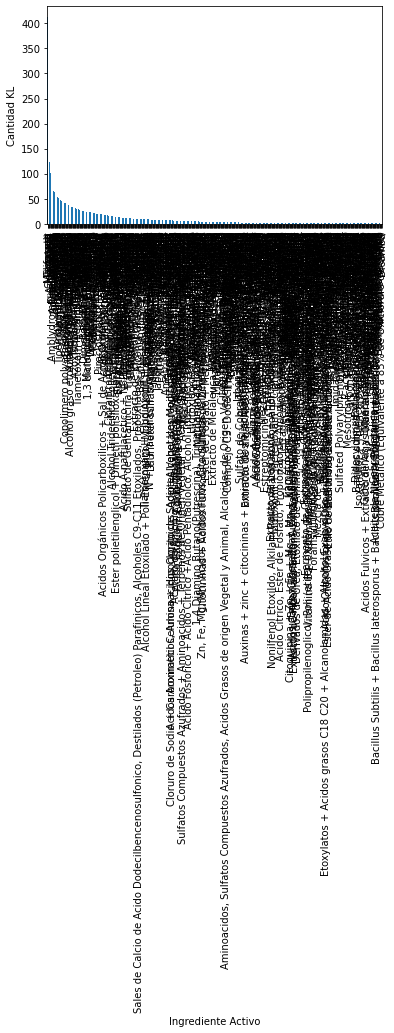

In [ ]:
dataset_cat_missing['I.A.'].value_counts ().sort_values (ascending= False).plot.bar()
plt.ylabel("Cantidad KL")
plt.xlabel("Ingrediente Activo")
plt.show()

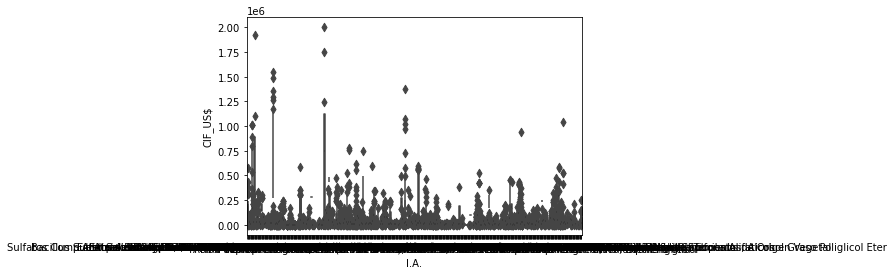

In [ ]:
# Verificar cual de los elementos es má probable de faltantes
import seaborn as sns
Valor = dataset_cat_missing['CIF_US$']
IA = dataset_cat_missing['I.A.']
sns.boxenplot(x= IA, y=Valor)
plt.show()

##### Codificación de Variables Categóricas

In [ ]:
def getCategoryVars(df):
    colnames = df.columns
    Cat_cols = []
    for col in colnames:
        if (df[col].dtype == 'object'):
            Cat_cols.append(col)
    return Cat_cols

In [ ]:
getCategoryVars(dataset)

['País',
 'Registro',
 'Clasificacion',
 'Clase',
 'Modo_de_acción',
 'Grupo_Químico',
 'I.A.',
 'Marca',
 'Concentración',
 'Grupo_importador',
 'Importador',
 'Aduana',
 'Transporte',
 'País_Origen',
 'País_procedencia',
 'Unidad',
 'Mes',
 'Grupo_fabricante/Offshore',
 'Fabricante/Offshore',
 'Estado',
 'Documento_Imp.']

In [ ]:
Cat_cols = getCategoryVars (dataset)

In [ ]:
Cat_cols.append('CIF_US$')

In [ ]:
dataset_categorics = dataset[Cat_cols]

In [ ]:
dataset_categorics

,País,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,Grupo_importador,...,Transporte,País_Origen,País_procedencia,Unidad,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Estado,Documento_Imp.,CIF_US$
0,Guatemala,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,Agricenter,...,Terrestre,Estados Unidos ...,Costa Rica ...,Litros,noviembre,Agricenter,Agricenter S.R.L.,Líquido,386-18,6659.60
1,Guatemala,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,Rainbow,...,Terrestre,China ...,Honduras ...,Litros,mayo,Rainbow,Agro Iris S.A.,Líquido,2-18,48000.00
2,Guatemala,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,Rainbow,...,Terrestre,China ...,Honduras ...,Litros,mayo,Rainbow,Agro Iris S.A.,Líquido,3-18,30000.00
3,Guatemala,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,Agrorganika,...,Terrestre,Costa Rica ...,Costa Rica ...,Litros,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",Líquido,1869-18,706.00
4,Guatemala,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,Agrorganika,...,Terrestre,Costa Rica ...,Costa Rica ...,Litros,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",Líquido,1870-18,6561.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Guatemala,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,Syngenta,...,Terrestre,México ...,México ...,Litros,octubre,Syngenta,"Syngenta, S.A",Líquido,1856-18,9208.86
6421,Guatemala,-302-35A-5,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,Tecun,...,Terrestre,México ...,México ...,Litros,abril,Syngenta,"Syngenta Crop Protection, S.A.",Líquido,847-19,49104.00
6422,Guatemala,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,Syngenta,...,Terrestre,México ...,México ...,Litros,abril,Syngenta,"Syngenta, S.A.",Líquido,921-19,17390.40
6423,Guatemala,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,Syngenta,...,Terrestre,México ...,México ...,Litros,junio,Syngenta,"Syngenta, S.A.",Líquido,1673-19,23701.80


In [ ]:
dataset_categorics.head()

,País,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,Grupo_importador,...,Transporte,País_Origen,País_procedencia,Unidad,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Estado,Documento_Imp.,CIF_US$
0,Guatemala,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,Agricenter,...,Terrestre,Estados Unidos ...,Costa Rica ...,Litros,noviembre,Agricenter,Agricenter S.R.L.,Líquido,386-18,6659.6
1,Guatemala,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,Rainbow,...,Terrestre,China ...,Honduras ...,Litros,mayo,Rainbow,Agro Iris S.A.,Líquido,2-18,48000.0
2,Guatemala,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,Rainbow,...,Terrestre,China ...,Honduras ...,Litros,mayo,Rainbow,Agro Iris S.A.,Líquido,3-18,30000.0
3,Guatemala,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,Agrorganika,...,Terrestre,Costa Rica ...,Costa Rica ...,Litros,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",Líquido,1869-18,706.0
4,Guatemala,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,Agrorganika,...,Terrestre,Costa Rica ...,Costa Rica ...,Litros,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",Líquido,1870-18,6561.0


In [ ]:
dataset_cat = dataset[['Clasificacion', 'CIF_US$']]

In [ ]:
dataset_cat.head()

,Clasificacion,CIF_US$
0,Línea Agrícola,6659.6
1,Línea Agrícola,48000.0
2,Línea Agrícola,30000.0
3,Línea Agrícola,706.0
4,Línea Agrícola,6561.0


In [ ]:
#identificar, cuantas categorías tenemos de la variable MSZoning:
dataset_cat ['Clasificacion'].value_counts()

Línea Agrícola        5406
Línea Industrial       669
Muestra                279
Estandar Analítico      48
Línea Urbana            23
Name: Clasificacion, dtype: int64

In [ ]:
#ONE HOT Encondig
# Crear una columan, por cada una de las categorías que tenemos disponibles. 
pd.get_dummies (dataset_cat['Clasificacion'])

,Estandar Analítico,Línea Agrícola,Línea Industrial,Línea Urbana,Muestra
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
6420,0,1,0,0,0
6421,0,1,0,0,0
6422,0,1,0,0,0
6423,0,1,0,0,0


###### #si hay mas de 10 categorías, ya no es recomendable, solo se debe de implementar cuando seda de 1 3 categorías máximos, en el Proceso de One hot Encodig. es un enfoque tradicional, pd.get_dummies (dataset_categorics)

In [ ]:
# Frequency Encodign: lo que hace es  que agarra la columna y cuenta la cantidad de columnas que contiene.
dataset_categorics['Grupo_importador'].value_counts().sort_values(ascending= False)

Syngenta                           890
Tecun                              669
Duwest                             601
Bayer                              546
Disagro                            371
                                  ... 
Eurocomm                             1
Sistemas Integrales de Limpieza      1
Dequigua                             1
Marubeni Corporation                 1
Adama                                1
Name: Grupo_importador, Length: 117, dtype: int64

###### # Se recomienda tener la más pequeña dimencionalidad: Frequency Encoding: cuenta la cantidad de ocurrencias que tiene la columna /ventajas tiene: no genera una columna, solo una representación númerica.

In [ ]:
dataset_categorics['Estado'].value_counts().sort_values(ascending= False)

Líquido    3902
Sólido     2523
Name: Estado, dtype: int64

In [ ]:
#Variable de lata frequencia
dataset_categorics['País_procedencia'].value_counts().sort_values(ascending= False)

Costa Rica                                            1240
Colombia                                              1192
China                                                  972
México                                                 660
Estados Unidos                                         551
Alemania                                               319
India                                                  256
Holanda                                                234
Honduras                                               177
Panamá                                                 164
Japón                                                  115
Israel                                                  85
Bélgica                                                 76
España                                                  55
Francia                                                 47
Mexico                                                  39
Nicaragua                                               

In [ ]:
dataset_categorics['Modo_de_acción'].value_counts().sort_values(ascending= False)


Sistémico                                                     1345
Contacto e ingestión                                           700
Contacto                                                       627
sistémico, translaminar, de contacto y estomacal               294
Contacto. Absorbido por el follaje, con poca traslocación.     287
                                                              ... 
Sistémico y Traslaminar                                          1
Reduce la tensión superficial del agua                           1
Surfactante, Adherente, Penetrante                               1
Estimulación de crecimiento                                      1
Parasitoide                                                      1
Name: Modo_de_acción, Length: 167, dtype: int64

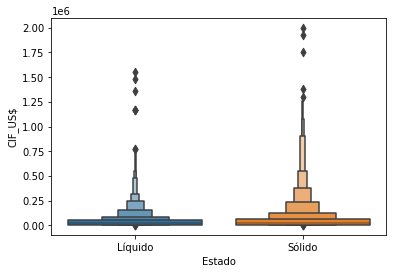

In [ ]:
#Analizar el impacto que tiene las variables

sales = dataset_categorics['CIF_US$']
bsq = dataset_categorics['Estado']
sns.boxenplot(x= bsq, y=sales)
plt.show()

In [ ]:
freq_mapper = dataset_categorics['Estado'].value_counts().sort_values(ascending= False).to_dict()
freq_mapper

{'Líquido': 3902, 'Sólido': 2523}

In [ ]:
# Le vamos a caer encima de la columna:
dataset_categorics['Estado']= dataset_categorics['Estado'].map(freq_mapper)

C:\Users\DICLA~1.VAS\AppData\Local\Temp/ipykernel_16840/3757522687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categorics['Estado']= dataset_categorics['Estado'].map(freq_mapper)


In [ ]:
density_mapper = (dataset_categorics['Estado'].value_counts().sort_values(ascending= False)/ len (dataset_categorics['Estado'])).to_dict ()
density_mapper

{3902: 0.6073151750972763, 2523: 0.3926848249027237}

In [ ]:
dataset = datas.parse('hoja1')
dataset.head()

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,CIF_US$,CIF_Q,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.
0,Guatemala,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,6659.6,51611.90,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18
1,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,48000.0,355968.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18
2,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,30000.0,222480.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18
3,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,706.0,5299.17,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18
4,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,6561.0,49246.28,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18


In [ ]:
dataset_temp = dataset

In [ ]:
def executefreqEncoding(df, map_type= 'freq'):
    colnames = df.columns

for col in colnames:
    if(df[col].dtype == 'object'):
        factor_div = 1 if (map_type =='freq') else len(df[col])
        mapper = (df[col].value_counts().sort_values (ascending= False)/ factor_div). to_dict()
        df[col]= df[col].map(freq_mapper)

KeyError: 'País'

In [ ]:
executefreqEncoding(dataset_temp)

In [ ]:
dataset_temp

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,CIF_US$,CIF_Q,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.
0,Guatemala,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,6659.60,51611.90,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18
1,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,48000.00,355968.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18
2,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,30000.00,222480.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18
3,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,706.00,5299.17,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18
4,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,6561.00,49246.28,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Guatemala,2018,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,9208.86,70942.66,3.996901,2018-10-01,octubre,Syngenta,"Syngenta, S.A",172.0,Líquido,1856-18
6421,Guatemala,2019,-302-35A-5,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,49104.00,376966.50,6.200000,2019-04-01,abril,Syngenta,"Syngenta Crop Protection, S.A.",507.0,Líquido,847-19
6422,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,17390.40,133372.89,3.293636,2019-04-08,abril,Syngenta,"Syngenta, S.A.",264.0,Líquido,921-19
6423,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,23701.80,182510.73,3.264711,2019-06-20,junio,Syngenta,"Syngenta, S.A.",313.0,Líquido,1673-19


In [ ]:
# Transformación de Variables Númericas:
import scipy.stats as stats

In [ ]:
len(dataset['CIF_US$'].unique())

4981

In [ ]:
# Como sacamos las columnas númericas
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_Vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object')and (unique_values> 30 )):
            numeric_continues_Vars.append(col)
    return numeric_continues_Vars

In [ ]:
getContinuesCols(dataset.drop())

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [ ]:
numeric_cont_vars = getContinuesCols(dataset)

In [ ]:
def plot_density_variable (df, variable):
    plt.figure(figsize= (15,6))
    plt.subplot(121)
    df[variable].hist (bins =30)
    plt.title(variable)


    plt.subplot(122)
    stats.probplot(df[variable], dist= "norm", plot= plt)
    plt.show()

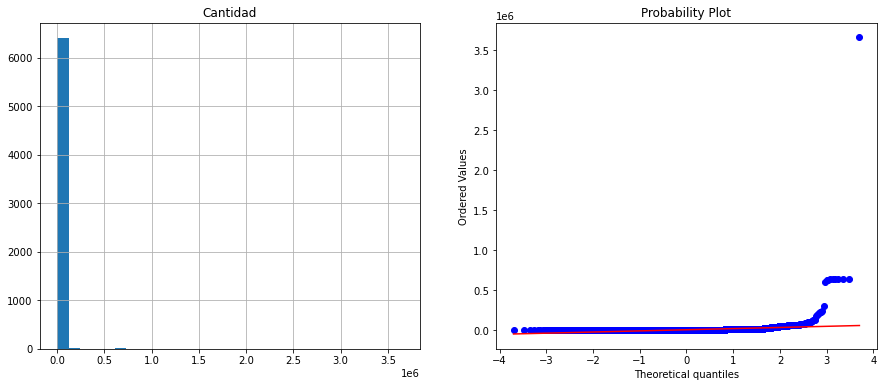

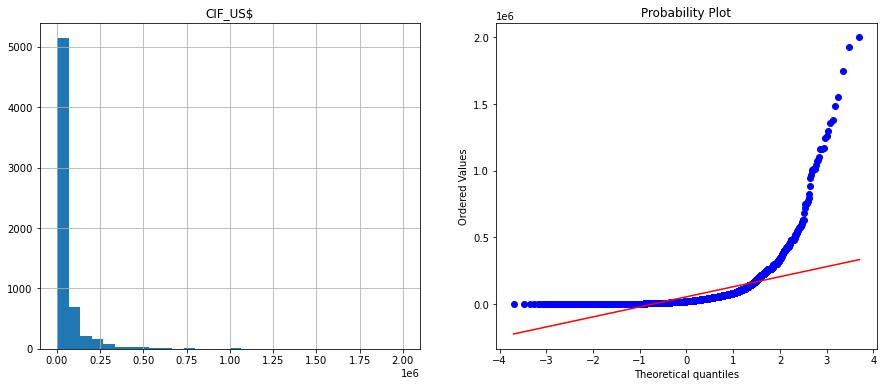

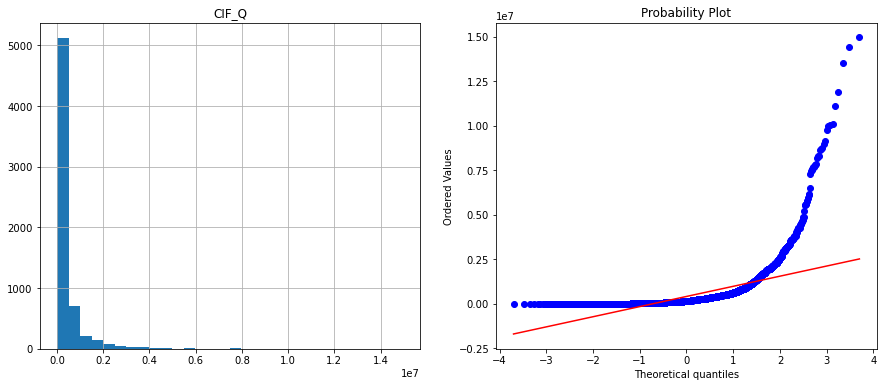

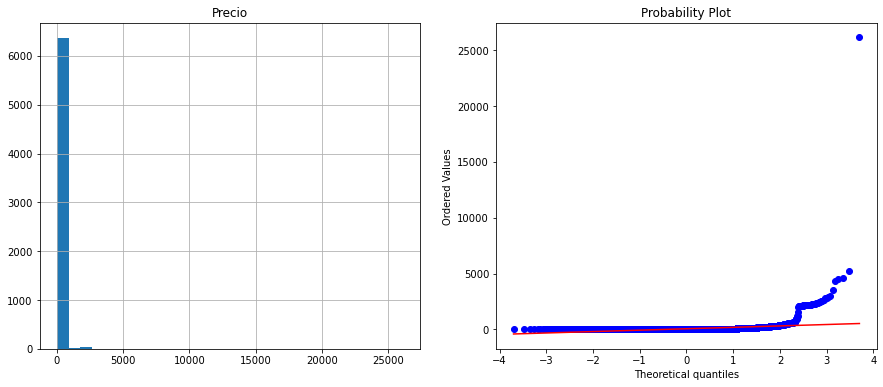

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

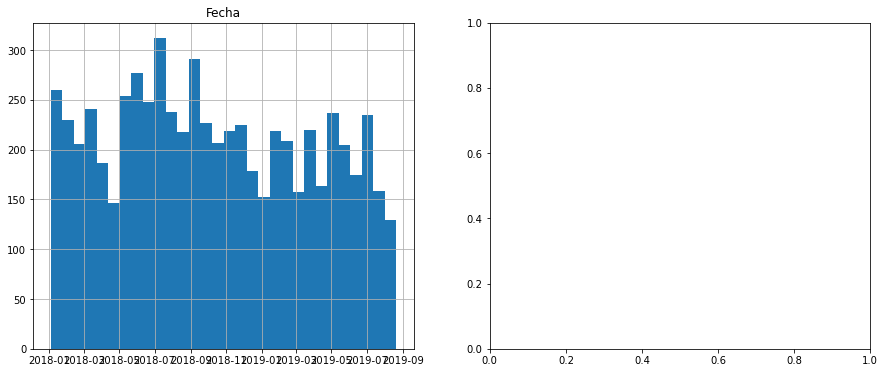

In [ ]:
for col in numeric_cont_vars:
        plot_density_variable(dataset, col)

###### # Analizar la columna independiente de LotArea, para  poder llegar al calculo de sego, curtosis, rangos de normalidad
###### importante antes de hacer la transformacion 

In [ ]:
dataset['CIF_US$']

0        6659.60
1       48000.00
2       30000.00
3         706.00
4        6561.00
          ...   
6420     9208.86
6421    49104.00
6422    17390.40
6423    23701.80
6424    17558.40
Name: CIF_US$, Length: 6425, dtype: float64

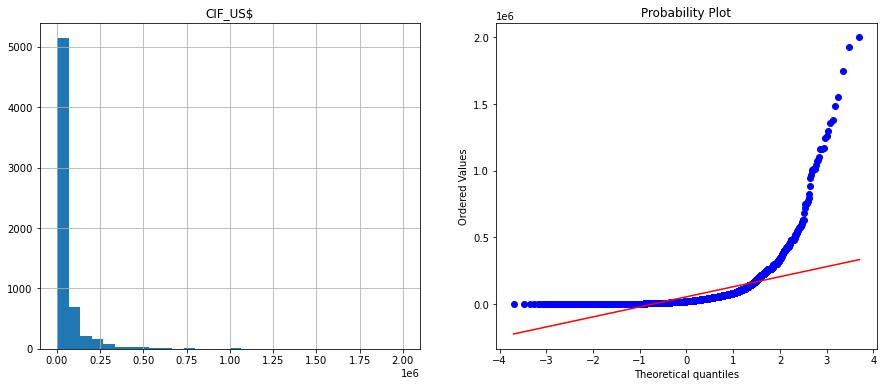

In [ ]:
plot_density_variable(dataset, 'CIF_US$')

In [ ]:
# con este código, se hace una copia para Tratar solo esa columna y que pasa si le aplicamos unas transformaciones
dataset_temp = dataset.loc[:, ['CIF_US$', 'Cantidad']]
dataset_temp

,CIF_US$,Cantidad
0,6659.60,240.0
1,48000.00,16000.0
2,30000.00,10000.0
3,706.00,200.0
4,6561.00,2025.0
...,...,...
6420,9208.86,2304.0
6421,49104.00,7920.0
6422,17390.40,5280.0
6423,23701.80,7260.0


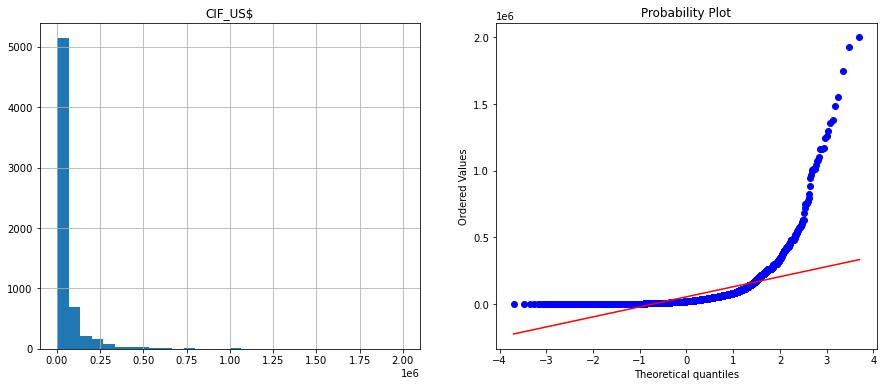

In [ ]:
plot_density_variable(dataset, 'CIF_US$')

In [ ]:
#aplicamos una transformación algoritmica a ese resultado 
dataset_temp ['CIF_US$_Log']= np.log(dataset['CIF_US$'])

In [ ]:
dataset_temp.head()

,CIF_US$,Cantidad,CIF_US$_Log
0,6659.6,240.0,8.803815
1,48000.0,16000.0,10.778956
2,30000.0,10000.0,10.308953
3,706.0,200.0,6.559615
4,6561.0,2025.0,8.788898


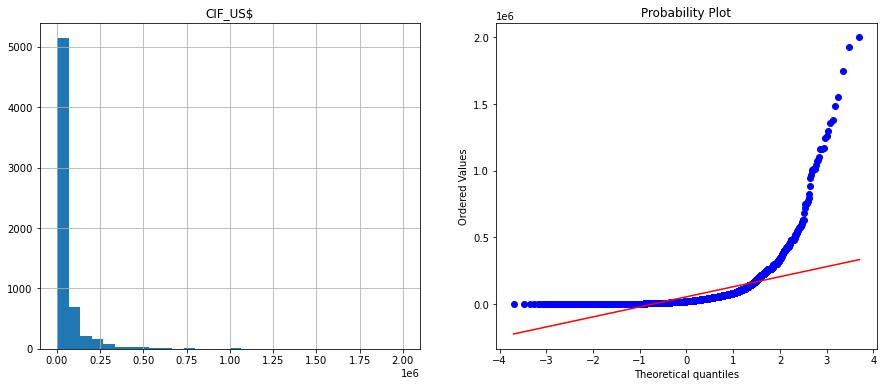

In [ ]:
#dominio de una función: signica conocer cuales son los valores que admitela función
plot_density_variable(dataset_temp, 'CIF_US$')

####Aplicamos la  transformación algoritmica, ya que los variable tiene valroes muy grandes, para volverlos más pequeños.
 

In [ ]:
# Transformación Inversa


In [ ]:
dataset_temp['CIF_US$_inv'] = (1/ dataset ['CIF_US$'])

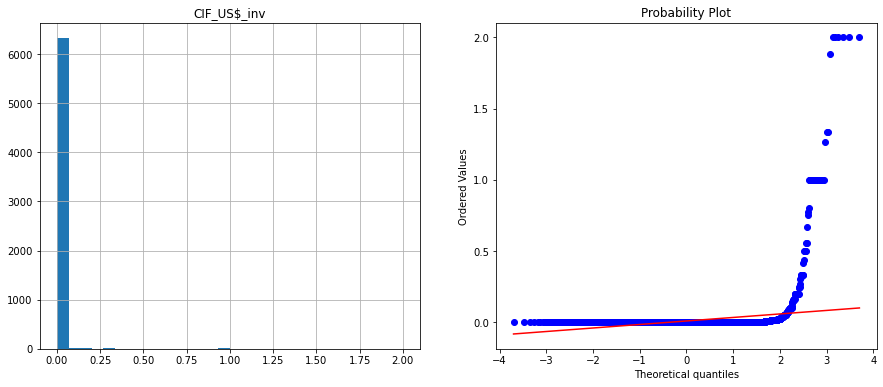

In [ ]:
plot_density_variable(dataset_temp, 'CIF_US$_inv')

###### No tiene valor negativos, por eso no se logra observar el cambio polinomial de orden 2

In [ ]:
dataset_temp['CIF_US$_quadratic'] = (dataset ['CIF_US$']**2)

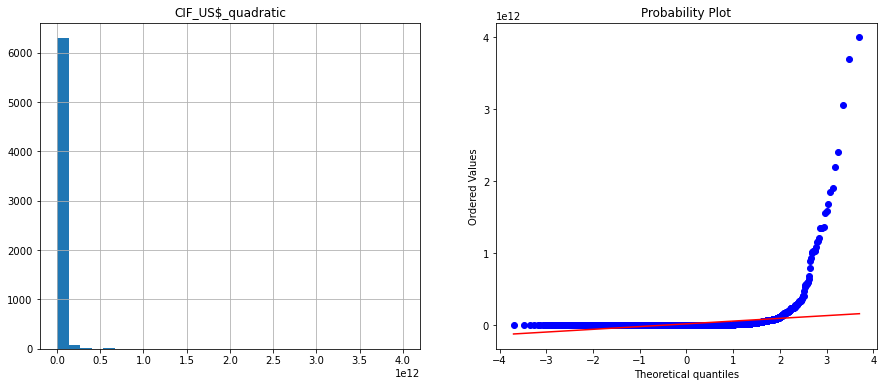

In [ ]:
plot_density_variable(dataset_temp, 'CIF_US$_quadratic')

In [ ]:

#Transformación Box-Cox: 

In [ ]:
# Intalar Libreria 
import scipy.stats as stats

In [ ]:
# TRansformación de YeoJohnson
dataset_temp['CIF_US$_YJ'], lambdaX= stats.yeojohnson(dataset_temp['CIF_US$'])

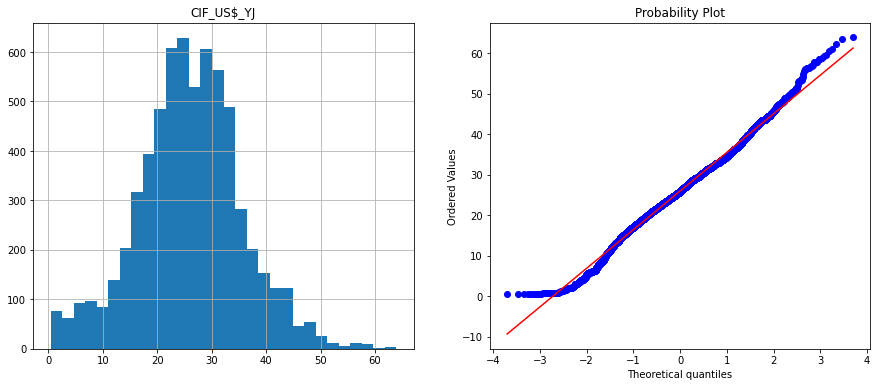

In [ ]:
plot_density_variable(dataset_temp, 'CIF_US$_YJ')

#### Definir cual es sería la mejor Correlación 

In [ ]:
np.corrcoef(dataset_temp['CIF_US$_YJ'], dataset_temp['Cantidad'])[0,1]

0.18075471667433704

In [ ]:
np.corrcoef(dataset_temp['CIF_US$_quadratic'], dataset_temp['Cantidad'])[0,1]

0.09695791380965986

In [ ]:
np.corrcoef(dataset_temp['CIF_US$_Log'], dataset_temp['Cantidad'])[0,1]

0.14386089440026148

In [ ]:
np.corrcoef(dataset_temp['CIF_US$_inv'], dataset_temp['Cantidad'])[0,1]

-0.014265203401879213

##### La mejor correlacion es:

##### Outliers

In [ ]:

# para inspección visual, por medio de gráficas

In [ ]:
def inspect_outliers (df, variable):
    plt.figure(figsize= (15,6))

    plt.subplot(131)
    sns.displot(df[variable], bins =30)
    plt.title("Densisd-Histograma: " + col )


    plt.subplot(132)
    stats.probplot(df[variable], dist= "norm", plot= plt)
    plt.title("QQ-Plot:" + col)

    plt.subplot(133)
    sns.boxplot(y= df[variable])
    plt.title("Boxplot:" + col)
    
    plt.show()

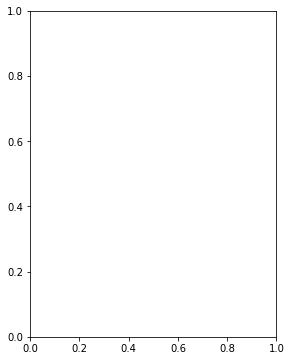

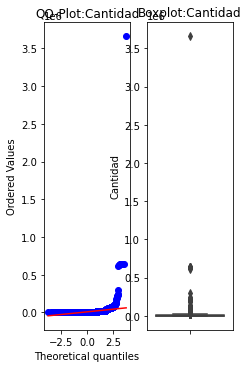

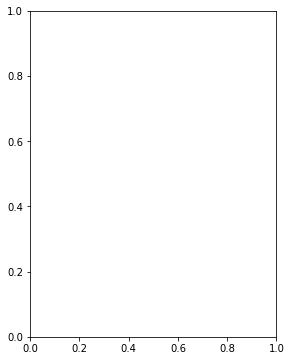

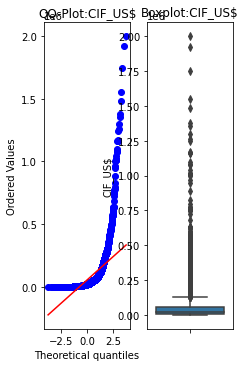

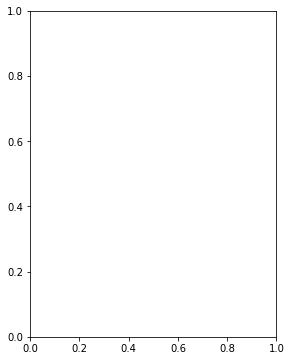

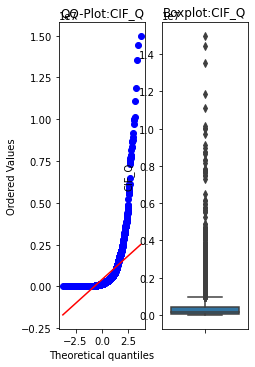

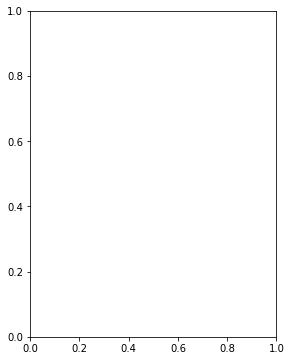

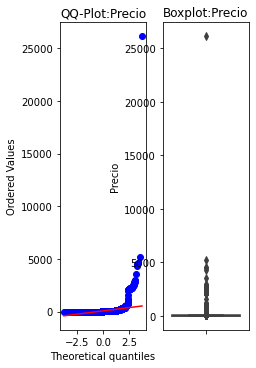

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

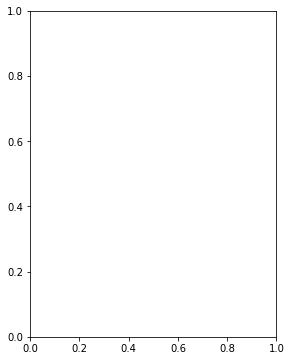

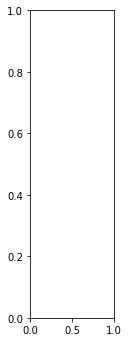

In [ ]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [ ]:

# crear una función que detecte los outliers
def detect_outliers(df, variable, factor):
    IQR = df[variable]

In [ ]:
factor = 1.75

In [ ]:
# Detectando outliers
def detect_outliers(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile (0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)  
    return LI, LS

In [ ]:
detect_outliers(dataset, 'Precio', 1.75)

(-51.92016934940402, 92.76738049507529)

In [ ]:
detect_outliers(dataset, 'Cantidad', 1.75)

(-12905.5, 21051.5)

In [ ]:
detect_outliers(dataset, 'CIF_US$', 1.75)

(-78975.22499999999, 140093.325)

In [ ]:
# código  sin función, referencia
IQR = dataset['Cantidad'].quantile(0.75) - dataset['Cantidad'].quantile (0.25)
LI = dataset['Cantidad'].quantile(0.25) - (IQR*factor)
LS = dataset['Cantidad'].quantile(0.75) + (IQR*factor)

In [ ]:
IQR

7546.0

In [ ]:
LI

-12905.5

In [ ]:
LS

21051.5

In [ ]:
# Este código muestra  la cantidad de columnas que cumplen con el rango
temp = dataset[((dataset ['Cantidad'] >= LI) & (dataset['Cantidad'] <= LS))]
temp

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,CIF_US$,CIF_Q,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.
0,Guatemala,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,6659.60,51611.90,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18
1,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,48000.00,355968.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18
2,Guatemala,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,30000.00,222480.00,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18
3,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,706.00,5299.17,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18
4,Guatemala,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,6561.00,49246.28,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Guatemala,2018,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,9208.86,70942.66,3.996901,2018-10-01,octubre,Syngenta,"Syngenta, S.A",172.0,Líquido,1856-18
6421,Guatemala,2019,-302-35A-5,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,49104.00,376966.50,6.200000,2019-04-01,abril,Syngenta,"Syngenta Crop Protection, S.A.",507.0,Líquido,847-19
6422,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,17390.40,133372.89,3.293636,2019-04-08,abril,Syngenta,"Syngenta, S.A.",264.0,Líquido,921-19
6423,Guatemala,2019,302-35A,Línea Agrícola,Herbicida,"Contacto. Absorbido por el follaje, con poca t...",Urea + Bipiridilo,Paraquat + Diuron,Gramuron X-30 SC,20.00 + 10.00,...,23701.80,182510.73,3.264711,2019-06-20,junio,Syngenta,"Syngenta, S.A.",313.0,Líquido,1673-19


In [ ]:
1 - len(temp)/ len(dataset)

0.05214007782101171

In [ ]:
#((dataset['Cantidad'] >= LI) & (dataset['Cantidad'] <= LS))

In [ ]:
dataset_temp = dataset

In [ ]:
limites= detect_outliers(dataset_temp, 'Cantidad', 1.75)
LF_LI , LF_LS = limites

NameError: name 'detect_outliers' is not defined

In [ ]:
dataset_temp['Cantidad_Cap'] = np.where(dataset_temp['Cantidad']> LF_LI, LF_LS, 
                                    np.where(dataset_temp['Cantidad'] < LF_LI, LF_LS, dataset_temp['Cantidad']))

NameError: name 'LF_LI' is not defined

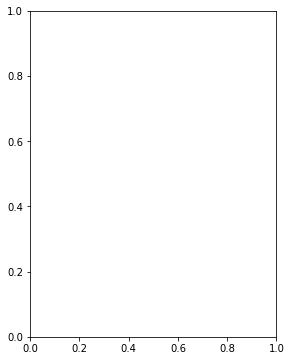

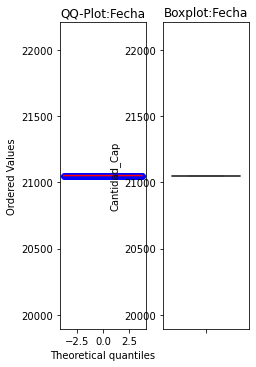

In [ ]:
inspect_outliers (dataset_temp, 'Cantidad_Cap')

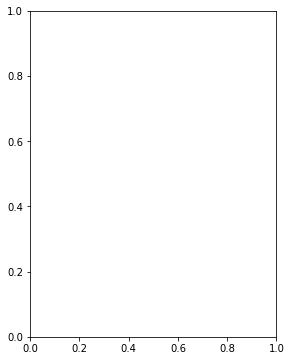

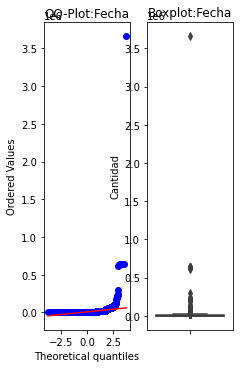

In [ ]:
# Comparando solo Cantidad
inspect_outliers (dataset_temp, 'Cantidad')

In [ ]:
# Le caemos encima a la varible original, para tratarla. 
def detect_outliers(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile (0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)  
 
    df[variable] = np.where(df [variable]> LS, LS, 
                                    np.where(df[variable] < LI, LI,  df[variable]))

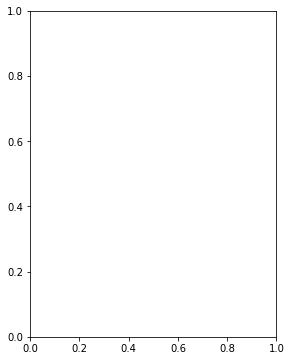

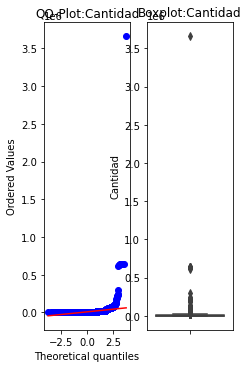

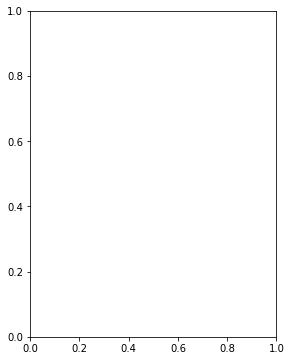

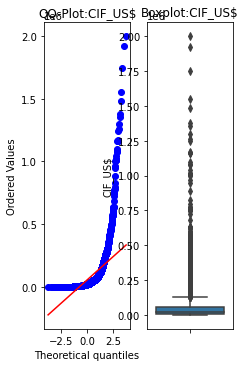

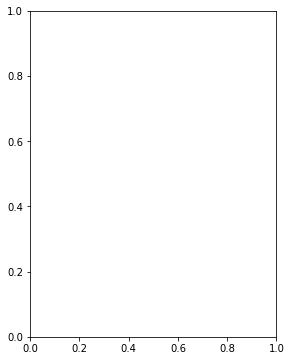

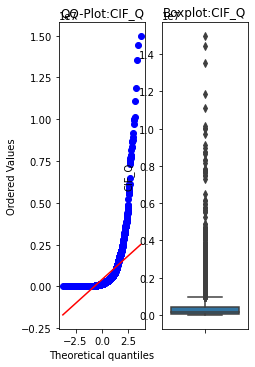

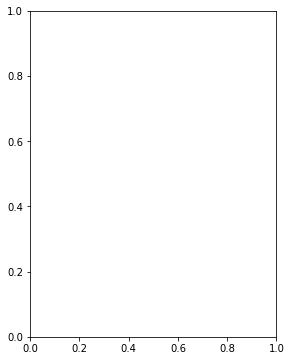

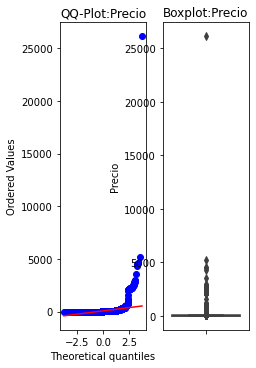

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

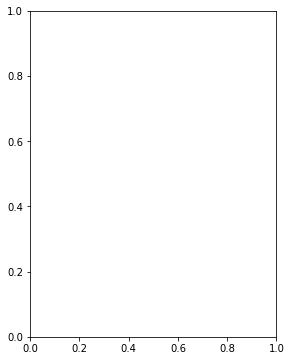

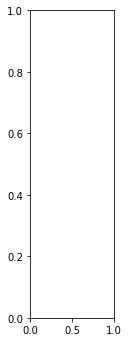

In [ ]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

##### Feauture Scaling: escalar los valores

In [ ]:

# buscamos el espacio de la solución de la data. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

dataset_temp = dataset.loc[:, numeric_cont_vars]

In [ ]:
dataset_temp.describe()

,Año,Cantidad,CIF_US$,CIF_Q,Precio,Timbres
count,6425.000000,6.425000e+03,6.425000e+03,6.425000e+03,6425.000000,6425.000000
mean,2018.344125,7.958204e+03,5.427410e+04,4.102917e+05,66.882016,410.112022
std,0.475119,5.322214e+04,1.146783e+05,8.663857e+05,407.544205,594.623007
min,2018.000000,2.000000e-02,5.000000e-01,3.670000e+00,0.002000,1.000000
25%,2018.000000,3.000000e+02,6.218100e+03,4.720111e+04,4.347211,125.000000
50%,2018.000000,1.200000e+03,2.016000e+04,1.526966e+05,13.790000,281.000000
75%,2019.000000,7.846000e+03,5.490000e+04,4.134922e+05,36.500000,542.000000
max,2019.000000,3.657984e+06,2.000000e+06,1.496590e+07,26128.000000,35680.000000


In [ ]:
dataset['Estado'].value_counts()

Líquido    3902
Sólido     2523
Name: Estado, dtype: int64

In [ ]:
scaler = StandardScaler()
scaler.fit(dataset_temp) #calcular parámetros de configuración para cada columna.

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[datetime64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
StandardScaler()

StandardScaler()

In [ ]:
dataset_temp_scaled = pd.DataFrame(scaler.transform(dataset_temp), columns=dataset_temp.columns)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
np.round(dataset_temp_scaled.describe(), 2)

NameError: name 'dataset_temp_scaled' is not defined

In [94]:
datasetnorm = dataset

In [95]:
categoric_vars = []
discrete_vars = []
continues_vars = []

for colname in datasetnorm.columns:
    if(datasetnorm[colname].dtype == 'object'):
        categoric_vars.append(colname)
    else:
        cantidad_valores = len(datasetnorm[colname].value_counts())
        if(cantidad_valores <= 30):
            discrete_vars.append(colname)
        else:
            continues_vars.append(colname)
print (categoric_vars, discrete_vars, continues_vars)

['País', 'Registro', 'Clasificacion', 'Clase', 'Modo_de_acción', 'Grupo_Químico', 'I.A.', 'Marca', 'Concentración', 'Grupo_importador', 'Importador', 'Aduana', 'Transporte', 'País_Origen', 'País_procedencia', 'Unidad', 'Mes', 'Grupo_fabricante/Offshore', 'Fabricante/Offshore', 'Estado', 'Documento_Imp.'] ['Año'] ['Cantidad', 'CIF_US$', 'CIF_Q', 'Precio', 'Fecha', 'Timbres', 'Cantidad_320', 'Cantidad_-1']


In [96]:
categoric_vars

['País',
 'Registro',
 'Clasificacion',
 'Clase',
 'Modo_de_acción',
 'Grupo_Químico',
 'I.A.',
 'Marca',
 'Concentración',
 'Grupo_importador',
 'Importador',
 'Aduana',
 'Transporte',
 'País_Origen',
 'País_procedencia',
 'Unidad',
 'Mes',
 'Grupo_fabricante/Offshore',
 'Fabricante/Offshore',
 'Estado',
 'Documento_Imp.']

In [ ]:
y = 'Estado'
categoric_vars.remove(y)

In [97]:
pais_level_map = datasetnorm['País'].value_counts().to_dict()
datasetnorm['País'] = datasetnorm['País'].map(pais_level_map)
datasetnorm.head()

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.,Cantidad_320,Cantidad_-1
0,6425,2018,_78-189-1,Línea Agrícola,Herbicida,Sistémico,Á. benzoico,Dicamba,Atectra 48 SL,48,...,27.748333,2018-11-30,noviembre,Agricenter,Agricenter S.R.L.,135.0,Líquido,386-18,240.0,240.0
1,6425,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,486.0,Líquido,2-18,16000.0,16000.0
2,6425,2018,724-35,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D","2,4-D / Dimaxine 72 SL",72,...,3.000000,2018-05-22,mayo,Rainbow,Agro Iris S.A.,353.0,Líquido,3-18,10000.0,10000.0
3,6425,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,3.530000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",30.0,Líquido,1869-18,200.0,200.0
4,6425,2018,_1183-14-2,Línea Agrícola,Herbicida,Sistémico hormonal,Á. Fenoxiacético,"2,4-D",HA 72 SL,72,...,3.240000,2018-08-27,agosto,Rimac,"Agroquimica Industrial Rimac, S.A.",130.0,Líquido,1870-18,2025.0,2025.0


In [98]:
Clasificacion_level_map = datasetnorm['Clasificacion'].value_counts().to_dict()
datasetnorm['Clasificacion'] = datasetnorm['Clasificacion'].map(Clasificacion_level_map)

In [99]:
Clase_level_map = datasetnorm['Clase'].value_counts().to_dict()
datasetnorm['Clase'] = datasetnorm['Clase'].map(Clase_level_map)

In [100]:
Modo_de_acción_level_map = datasetnorm['Modo_de_acción'].value_counts().to_dict()
datasetnorm['Modo_de_acción'] = datasetnorm['Modo_de_acción'].map(Modo_de_acción_level_map)

In [101]:
Grupo_Químico_level_map = datasetnorm['Grupo_Químico'].value_counts().to_dict()
datasetnorm['Grupo_Químico'] = datasetnorm['Grupo_Químico'].map(Grupo_Químico_level_map)

In [102]:
IA_level_map = datasetnorm['I.A.'].value_counts().to_dict()
datasetnorm['I.A.'] = datasetnorm['I.A.'].map(IA_level_map)

In [103]:
Marca_level_map = datasetnorm['Marca'].value_counts().to_dict()
datasetnorm['Marca'] = datasetnorm['Marca'].map(Marca_level_map)

In [104]:
Grupo_importador_level_map = datasetnorm['Grupo_importador'].value_counts().to_dict()
datasetnorm['Grupo_importador'] = datasetnorm['Grupo_importador'].map(Grupo_importador_level_map)

In [105]:
Concentración_level_map = datasetnorm['Concentración'].value_counts().to_dict()
datasetnorm['Concentración'] = datasetnorm['Concentración'].map(Concentración_level_map)

In [106]:
Importador_level_map = datasetnorm['Importador'].value_counts().to_dict()
datasetnorm['Importador'] = datasetnorm['Importador'].map(Importador_level_map)

In [107]:
Aduana_level_map = datasetnorm['Aduana'].value_counts().to_dict()
datasetnorm['Aduana'] = datasetnorm['Aduana'].map(Aduana_level_map)

In [108]:
Transporte_level_map = datasetnorm['Transporte'].value_counts().to_dict()
datasetnorm['Transporte'] = datasetnorm['Transporte'].map(Transporte_level_map)

In [109]:
País_Origen_level_map = datasetnorm['País_Origen'].value_counts().to_dict()
datasetnorm['País_Origen'] = datasetnorm['País_Origen'].map(País_Origen_level_map)

In [110]:
País_procedencia_level_map = datasetnorm['País_procedencia'].value_counts().to_dict()
datasetnorm['País_procedencia'] = datasetnorm['País_procedencia'].map(País_procedencia_level_map)

In [111]:
Unidad_level_map = datasetnorm['Unidad'].value_counts().to_dict()
datasetnorm['Unidad'] = datasetnorm['Unidad'].map(Unidad_level_map)

In [112]:
Mes_level_map = datasetnorm['Mes'].value_counts().to_dict()
datasetnorm['Mes'] = datasetnorm['Mes'].map(Mes_level_map)

In [113]:
Fabricante_Offshore_level_map = datasetnorm['Fabricante/Offshore'].value_counts().to_dict()
datasetnorm['Fabricante/Offshore'] = datasetnorm['Fabricante/Offshore'].map(Fabricante_Offshore_level_map)

In [114]:
Grupo_fabricante_Offshore_level_map = datasetnorm['Grupo_fabricante/Offshore'].value_counts().to_dict()
datasetnorm['Grupo_fabricante/Offshore'] = datasetnorm['Grupo_fabricante/Offshore'].map(Grupo_fabricante_Offshore_level_map)

In [115]:
Documento_Imp_level_map = datasetnorm['Documento_Imp.'].value_counts().to_dict()
datasetnorm['Documento_Imp.'] = datasetnorm['Documento_Imp.'].map(Documento_Imp_level_map)

In [116]:
Registro_level_map = datasetnorm['Registro'].value_counts().to_dict()
datasetnorm['Registro'] = datasetnorm['Registro'].map(Registro_level_map)
datasetnorm.head()

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.,Cantidad_320,Cantidad_-1
0,6425,2018,1,5406,1500,1345,1,1,1,112,...,27.748333,2018-11-30,291,9,28,135.0,Líquido,1,240.0,240.0
1,6425,2018,4,5406,1500,227,109,108,4,108,...,3.000000,2018-05-22,818,373,35,486.0,Líquido,1,16000.0,16000.0
2,6425,2018,4,5406,1500,227,109,108,4,108,...,3.000000,2018-05-22,818,373,35,353.0,Líquido,1,10000.0,10000.0
3,6425,2018,5,5406,1500,227,109,108,5,108,...,3.530000,2018-08-27,592,63,44,30.0,Líquido,1,200.0,200.0
4,6425,2018,5,5406,1500,227,109,108,5,108,...,3.240000,2018-08-27,592,63,44,130.0,Líquido,1,2025.0,2025.0


In [118]:
datasetnorm.head()

,País,Año,Registro,Clasificacion,Clase,Modo_de_acción,Grupo_Químico,I.A.,Marca,Concentración,...,Precio,Fecha,Mes,Grupo_fabricante/Offshore,Fabricante/Offshore,Timbres,Estado,Documento_Imp.,Cantidad_320,Cantidad_-1
0,6425,2018,1,5406,1500,1345,1,1,1,112,...,27.748333,2018-11-30,291,9,28,135.0,Líquido,1,240.0,240.0
1,6425,2018,4,5406,1500,227,109,108,4,108,...,3.000000,2018-05-22,818,373,35,486.0,Líquido,1,16000.0,16000.0
2,6425,2018,4,5406,1500,227,109,108,4,108,...,3.000000,2018-05-22,818,373,35,353.0,Líquido,1,10000.0,10000.0
3,6425,2018,5,5406,1500,227,109,108,5,108,...,3.530000,2018-08-27,592,63,44,30.0,Líquido,1,200.0,200.0
4,6425,2018,5,5406,1500,227,109,108,5,108,...,3.240000,2018-08-27,592,63,44,130.0,Líquido,1,2025.0,2025.0


In [120]:
datasetnorm.to_csv("DatasetTransform1.csv")